# Day 9: Hypothesis Testing & Acceptable Error
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Lessons/HypothesisTesting.md

## What is null hypothesis?
It is the formal method of reaching conclusions based on population statistics and sample data where we apply changes to a population

## Null hypothesis examples
- Rain dance, cultures people dance together to have rain during periods of drought
- We want to test if a drug has an impact on the brain
- Does a food boost your IQ?
- A/B testing //*like testing user engagement*

----

## Review of Z Distribution, CDF, and SF (survival)
### Z-Distribution
- Z-distribution is another name for standard **Normal distribution**
- When the samples of our numerical array are Normal with an arbitrary mean and std
- If scale each element by subtracting elements from the mean, and divide over the std, then the new array would be a Normal distribution with zero mean, and std 1

### Probability Distribution Function (PDF)
- PDFs have a similar pattern to histogram. The only difference is that we normalize the value of histograms

### Cumulative Density Function (CDF)
- In above example, we could not easily obtain the percentage from a PDF, although it is possible. 
- This is much easier if we use a CDF. A CDF calculates the probability that a random variable is less than a threshold value
- Let's learn CDF by example: given an array of numbers (our random variable) and a threshold value as input:
	1.	Find the minimum value in the array
	2.	Set the threshold to be the minimum value of the array
	3.	For a given array of numbers and a given threshold, count all of the elements in the array that are less than the threshold, and divide that count by the length of the array
	4.	Repeat step three, increasing the threshold by one, until you go through step three where threshold is equail to the maximum value in the array

![Image of CDF and Z-Distribution](static/images/cdf_and_z-distribution.png)

### Review of Z distribution, CDF and SF
Activity: Generate 10000 sample as a random variable with Normal distribution with pre-define mean and standard deviation. Hint = 
```
from scipy.stats import norm 
norm.rvs(loc= , scale= , size=10000)
```

Write a code to show that $Z = \frac{X - \mu}{\sigma}$, is standard Normal Hint: Plot histogram of Z, show Z is standard normal

## Null hypothesis drug example on rat //22m
A neurologist is testing the effect of a drug on response time by **injecting 100 rats** with a unit dose of a drug, subjecting each to neurologist stimulus and recording its response time. The neurologist knows that the **mean response time for rats not injected with the drug is 1.2 seconds**. The **mean of the 100 injected rats's response time is 1.05 seconds with population standard deviation of 0.5 seconds**. Do you think the drug has effect on response time?

$H_o :$ Drug has no effect ==> $\mu_x = 1.2$ even with drug 

$H_a :$ Drug has effect ==> $\mu_x \neq 1.2$ when the drug is given

![STD Formula](static/images/std_formula.png)

## Z-Distribution vs T-Distribution
https://docs.google.com/presentation/d/1BQibGlrpX71JU0jBU0C7zJJr6S_4WQeFzO7PBmnxf8g/edit#slide=id.g5c1d9ce33d_0_10

#### Slide 1: Definitions
- μ = Population mean for Scenario A
- 𝞼 = standard deviation (std) for Scenario A
- 𝛼 = statistical significance level
- X̅ = Sample Mean for Scenario B
- N = Number of samples for Scenario B
- S = Sample std for Scenario B

### Slide 2: 
- μ = Population mean for Scenario A
- 𝞼 = Population standard deviation (std) for Scenario A
- 𝛼 = statistical significance level
- X̅ = Sample Mean for Scenario B
- N = Number of samples (e.g. = 100) for Scenario B
- S = Sample std for Scenario B
- μx = Population mean for Scenario A is unknown


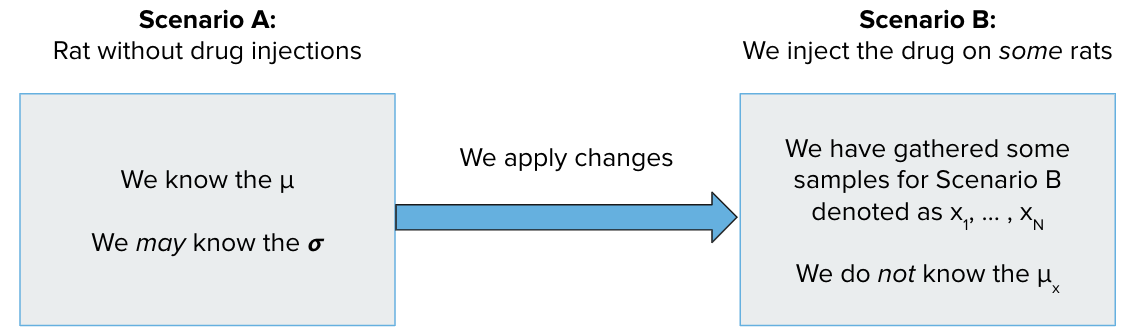

### Slide 3

Goal: 
We want to have a conclusion about μx for Scenario B

### Slide 4

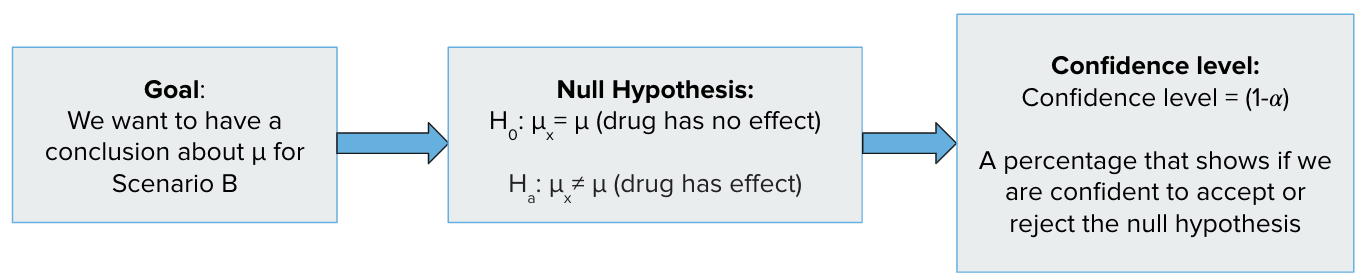

### Slide 5
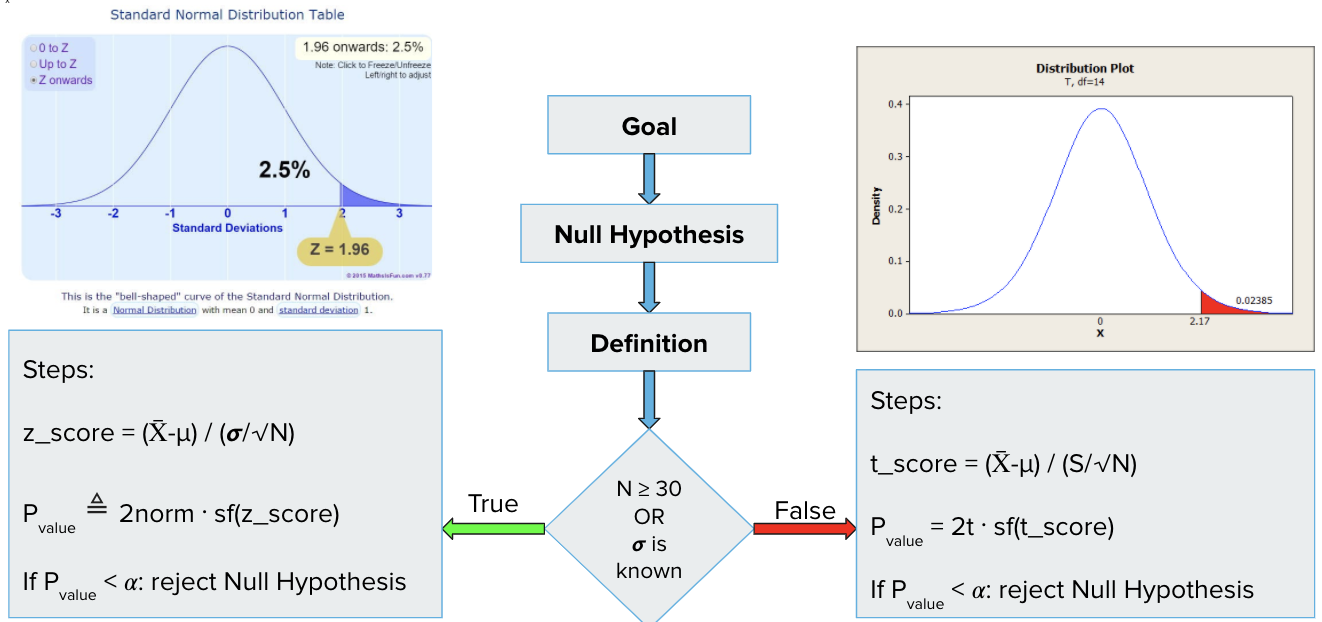

### Slide 6
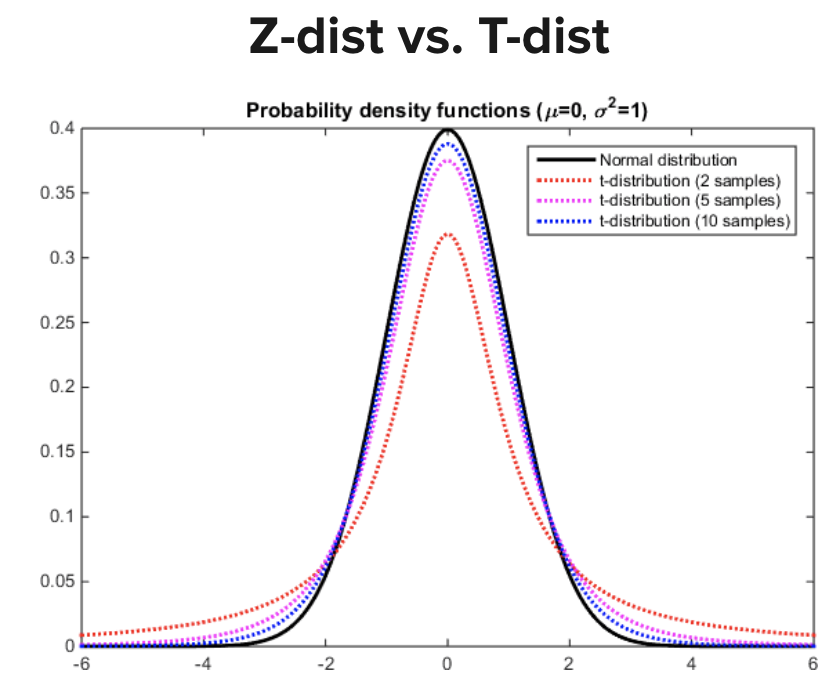

----

## The steps to reject or accept the null hypothesis
1. The population mean is known, $\mu$ **//mu**
2. The sample mean is known, $\bar{x}$ 
3. Define a significant level, $\alpha$ **//alpha = if alpha is 0.05, our confidence level is 95%**
4. If $N$ > 30, calculate z-score, $z_{score} = \frac{\bar{x} - \mu}{\sigma/\sqrt{N}}$ 
5. Calculate $p_{value}, p_{value} = 2SF(|Z_{score}|)$ 
    - **Note that we multiplied by 2 because alternative is $\neq$ written as $\mu_x \neq 1.2$. If it would have been >= or <= you do not multiply by 2**
6. Decision: if $p_{value} < \alpha$ then reject the null hypothesis

## Activity: z-test 
Write a function the takes **the mean of population, significant level, and the samples** as the input argument then **decide to reject or accept the null hypothesis** for drug effect on rat

Recall: 
- $\mu = 1.2$
- $\bar{x} = 1.05$
- $N = 100$ 
- $\sigma = 0.5$

In [19]:
from scipy.stats import norm
import numpy as np

def accept_or_reject_null_hypothesis(mu, sample_mean, significant_level, N, sigma):
    # Step 4 - Calculate standard deviation of the sampling distribution
    sample_std = sigma / N

    # Calculate z-score from population mean (mu), sample mean and sample std
    z = (sample_mean - mu) / sample_std

    # Step 5- Calculate p-value from z-score
    p_value = 2 * norm.cdf(-np.abs(z))

    # Step 6 - Determine whether to accept or reject null hypothesis
    if p_value < significant_level:
        print('reject null hypothesis')
    else:
        print('accept null hypothesis')
        
accept_or_reject_null_hypothesis(1.2, 1.05, 0.05, 100, 0.5) #alpha of 0.05

reject null hypothesis


## Activity: T-test
The average British man is 175.3 cm tall. A survey recorded the heights of 10 British men who drank a special type of Milk for 2 years.

Calculate the t-score from the previous formula and use the available function in stats.ttest_1samp. Compare what you will get with x as your input:

```x = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]```

We want to know whether the mean of the sample is different from the population mean

$T_{score} = (X̅-μ) / (S/√N)$

In [16]:
from scipy import stats
import numpy as np

x = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
mu = 175.3
sample_mean = np.array(x).mean()

# Calculate the standard deviation of sample distribution

N = len(x) # number of data samples (Numerator)
S = np.array(x).std(ddof=1) #standard deviation
den = S /np.sqrt(N) #denominator

# t-test from formula
t = (sample_mean - mu)/den
print("t-statistic: ",t)

# one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, mu)
print("t = ", t, ", p = ", p)

t-statistic:  2.295568968083183
t =  2.295568968083183 , p =  0.04734137339747034


##### So, we conclude that Milk has an effect on the heights

### Note:
We can calculate $T_{score}$ and $P_{value}$ from scipy's stats like so

Mu ($\mu$) is the population mean known as

```t, p = stats.ttest_1samp(arr, mu)```

## Activity: z-test or t-test

Write a function that determines whether to use **z-test** or **t-test** in order **to accept or reject null hypothesis**

#### Note: To determine to use Z-test or T-test consider the following:
- Use **z-test** if **sigma is known**
- Also use **z-test** if **length of data sample is greater than 30**
- Use **t-test** if sigma is **not known** or **length of data sample is less than 30**

In [17]:
def z_t_null_hypothesis(data_sample, mu, sigma, significant_level):
    # If sigma is known, calculate using the z-test
    if sigma:
        z_score = (np.mean(data_sample)-mu)/(sigma/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
    # If the data_sample is greater than 30, calculate using the z-test
    elif len(data_sample) > 30:
        z_score = (np.mean(data_sample)-mu)/(np.std(data_sample)/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
    # otherwise, calculate using the t-test
    else:
        t, p = stats.ttest_1samp(data_sample, mu)

    if p < significant_level:
        print('reject null hypothesis')
        
    else:
        print('accept null hypothesis')

## What is a one-tail or two-tail calculation for a p-value?
If the alternative hypothesis says the mean of a sample is different from the mean of the population, we should compute the p-value using two-tail. If it says the mean of a sample is greater or lower than the mean of a population, we should compute using one-tail

## Possible errors that can happen when accepting or rejecting the null hypothesis
**Type I error**: We reject the null hypothesis when the null is true

$\alpha$ = P(rejecting $H_o$ $|$ $H_o$ is true)

**Type II error**: We accept the null hypothesis when it is not true

$\beta$ = P(accepting $H_o$ $|$ $H_o$ is false)

The drug has an effect on the brain

The drug has no effect on the brain

## Other examples for statistical test
Please read the Unpaired t-test part of this article

http://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python


## t-tests in python
The t-test is a mainstay of basic analysis in many fields. In python the scipy.stats module offers **1-sample**, **two-sample unpaired**, and **paired t-tests**.

###  1-sample t-test
The 1-sample t-test is used when we want to compare a sample mean to a population mean (which we already know). The average British man is 175.3 cm tall. A survey recorded the heights of 10 UK men and we want to know whether the mean of the sample is different from the population mean.
```
from scipy import stats
one_sample_data = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

one_sample = stats.ttest_1samp(one_sample_data, 175.3)

print "The t-statistic is %.3f and the p-value is %.3f." % one_sample
```

```
The t-statistic is 2.296 and the p-value is 0.047.
```

Here we can conclude that the average height of our sample is significantly different (p <  0.05) from the average British male height. The return value is the result of a two-sided t-test and is a tuple containing the t-value and the p-value.

### Unpaired t-test
This test compares two unrelated samples. In the example below data was collected on the weight (kg) of 8 elderly women and 8 elderly men. We are interested in whether the weights of these two samples is different.
```
female = [63.8, 56.4, 55.2, 58.5, 64.0, 51.6, 54.6, 71.0]
male = [75.5, 83.9, 75.7, 72.5, 56.2, 73.4, 67.7, 87.9]

two_sample = stats.ttest_ind(male, female)

print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

# assuming unequal population variances
two_sample_diff_var = stats.ttest_ind(male, female, equal_var=False)

print "If we assume unequal variances than the t-statistic is %.3f and the 
p-value is %.3f." % two_sample_diff_var
```

```
The t-statistic is 3.588 and the p-value is 0.003.
If we assume unequal variances than the t-statistic is 3.588 and the p-value is 0.004.
```

Here we can conclude that the weights of men and women are indeed different (p <  0.01). Like the 1-sample test above the return value is a tuple containing the t-statistic and the p-value and these are the results of a two-sided test. If we suspect that the samples we are looking at come from populations with unequal variances we can set the equal_var parameter in the test to False. The results are then from Welch’s t-test, which does not assume equal population variance.

### Paired t-test
The paired t-test is used when we have two sets of repeated measures i.e. we have measured some parameter on the same subjects at different times (or under different conditions). In the example the weight of 9 people were recorded before they had abdominal surgery and then again 5 months later. We are asking if surgery leads to a change in weight.
```
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]

paired_sample = stats.ttest_rel(baseline, follow_up)

print "The t-statistic is %.3f and the p-value is %.3f." % paired_sample
```

```
The t-statistic is 3.668 and the p-value is 0.006.
```
From the results we see that weight has changed significantly between pre- and post-surgery (p <  0.01).

### Homework
https://docs.google.com/document/d/1ITryiXU_VoyBvtZY4deehk4PmlieSlF7rSNc8sBU3Sw/edit

# Day 10: Confidence Intervals, Outliers, and Statistical Analysis
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Outlier_Correlation_StatisticalAnalysis.ipynb

## Warmup From the given Brain_Size dataset:
- Compare VIQ for female and male

In [35]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy import stats

data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

# For Unpaired two Samples t-test 
# stat, p = stats.ttest_ind(Sample_A, Sample_B)

### Steps:
1- Obtain the mean VIQ for the male and female samples

2- Can we accept that population average (mean) of VIQ are the same for male and female?

 Hint: Calculate the T-test for the means of two independent samples

 If the p-value is smaller than the threshold (significant level), e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages 
 (accept different population average)


In [36]:
data.head()
# data.shape

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [37]:
# STEP 1
male_viq = data[data["Gender"] == "Male"]["VIQ"]
female_viq = data[data["Gender"] == "Female"]["VIQ"]
print(male_viq.mean(), female_viq.mean())

115.25 109.45


### Extent the above analysis of 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height' for male and female
- Performance IQ (PIQ)
- Verbal IQ (VIQ)
- Full Scale Intelligence Quotient (FSIQ)

#### T-Test steps
1. The population mean is known, $\mu$ **//mu**
2. The sample mean is known, $\bar{x}$ 
3. Define a significant level, $\alpha$ **//alpha = if alpha is 0.05, our confidence level is 95%**
4. If $N$ > 30, calculate z-score, $z_{score} = \frac{\bar{x} - \mu}{\sigma/\sqrt{N}}$ 
5. Calculate p_{value}, $p_{value} = 2SF(|Z_{score}|)$ 
    - **Note that we multiplied by 2 because alternative is $\neq$ written as $\mu_x \neq 1.2$. If it would have been >= or <= you do not multiply by 2**
6. Decision: if $p_{value} < \alpha$ then reject the null hypothesis

In [39]:
print(stats.ttest_ind(female_viq, male_viq))

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)


In [40]:
print(stats.ttest_ind(female_viq, male_viq, equal_var = False))

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44466074519419097)


In [41]:
print(stats.ttest_ind(female_viq, male_viq, equal_var = True))

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)


In [1]:
from scipy import stats
import numpy as np

male_viq = data[data["Gender"] == "Male"]["VIQ"]
female_viq = data[data["Gender"] == "Female"]["VIQ"]
print(male_viq.mean(), female_viq.mean())

def get_ttest(column):
    for row_value in column

SyntaxError: invalid syntax (<ipython-input-1-4e7f80419fbf>, line 9)

# Day 11: Statistical Analysis and GMM
In Day 10 notes https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Outlier_Correlation_StatisticalAnalysis.ipynb

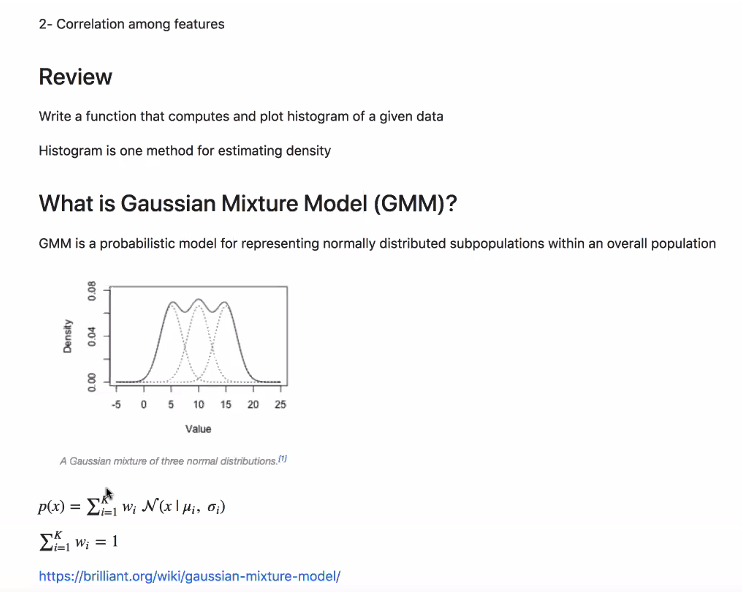

## What is the Goal for using GMM (normal distribution)?
- We want to approximate the density (histogram) of any given data sample with combination of Normal Distribution
- How many Normal Distribution we need is definded by us (2 or 3 or 4,...)

## Activity: Fit a GMM to a given data sample
Task:
1. Generate the concatination of the random variables as follows:
```
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000)
x = np.concatenate((x_1, x_2))
```
2. Plot the histogram of x

    **Questions**
    - What is the mean and variance of x1?
    - What is the mean and variance of x2?
    - What percentage of data in x is x1? What percentage of data in x is x2?
    
3. Obtain the weights, mean and variances of each Gassuian
Steps

x_1 mean= -4.999205821118017 	variance= 0.9910639070487284
x_2 mean= 1.965578461546576 	variance= 8.99855791497796
0.3
0.7


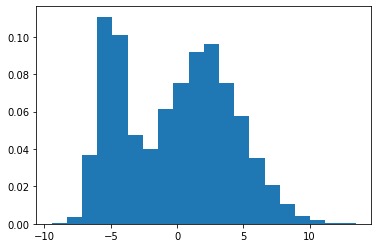

Means [[ 2.07025241]
 [-4.94756696]]
GMM Cov [[[8.52984445]]

 [[1.07560733]]]
GMM Weights [0.68735171 0.31264829]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture #needed for GMM

#1
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000)
x = np.concatenate((x_1, x_2))

# Q1 What is the mean and variance of x1?
print("x_1 mean=", np.mean(x_1), "\tvariance=", np.var(x_1))
# Q2 What is the mean and variance of x2?
print("x_2 mean=", np.mean(x_2), "\tvariance=", np.var(x_2))
# Q3: What percentage of data in x is x1? What percentage of data in x is x2?
print(len(x_1)/len(x)) #3000/10000
print(len(x_2)/len(x)) #7000/10000

# 2
plt.hist(x, bins=20, density=1)
plt.show()

# Define a GMM model and obtain its parameters
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1)) #this is normal data type for GMM //40m
print("Means", gmm.means_) #The means of two Normal distribution
print("GMM Cov", gmm.covariances_) #The variances of two Normal distributions
print("GMM Weights", gmm.weights_) #The weights of two Normal distributions

### The GMM has learned the probability density function of our data sample
Let's generate the samples from the GMM:

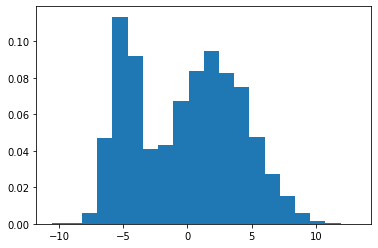

In [28]:
z = gmm.sample(10000) #list of list
plt.hist(z[0], bins=20, density=1)
plt.show()

### Question: Are the samples in z and x the same?
- The samples in X and X are not identical, however they have the same exact statistical properties

### Question: What is the main goal of GMM?
- GMM can learn about the statistics of a column in our data_frame
- GMM is capable to generate new samples based on the statistiics of non NaN values then GMM can generate samples for NaN values for us

- The number of components in GMM denoted as (K) should be defined by user based on the **number of peaks**

#### In short
- Z != X, but the PDF of Z is the same as PDF of X
- The main purpose of GMM is to use it to fill missing values (NaN)

## Kernel Density Estimation (KDE) //41m
Kernel density estimation (KDE) is a non-parametric way to estimate the probability density funciton of a data sample. In other words the aim of KDE is to find the PDF for a given data sample.

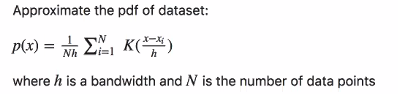

### Activity: Apply KDE on a given sample
Task: Apply KDE on the previously generated sample data x

Hint: use

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)

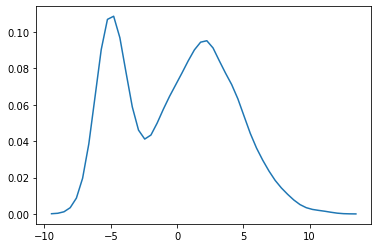

In [38]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6) #instantiate model, there is a way to get the range of bandwidth, for now stick to trial and error and make it as close as possible to get it to loook like the PDF of the graph
kde.fit(x.reshape(-1,1)) #fit method and pass list of list

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

### The KDE has learned the probability density function of our data sample
Let's generate the samples from the KDE:

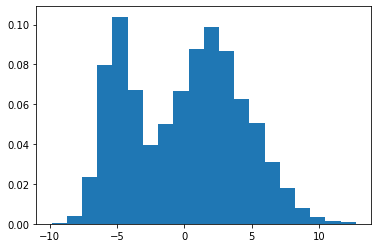

In [30]:
m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()

### KDE can learn handwitten digits distribution and generate new digits

http://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html

#### Article Contents:
This example shows how kernel density estimation (KDE), a powerful non-parametric density estimation technique, can be used to learn a generative model for a dataset. With this generative model in place, new samples can be drawn. These new samples reflect the underlying model of the data.

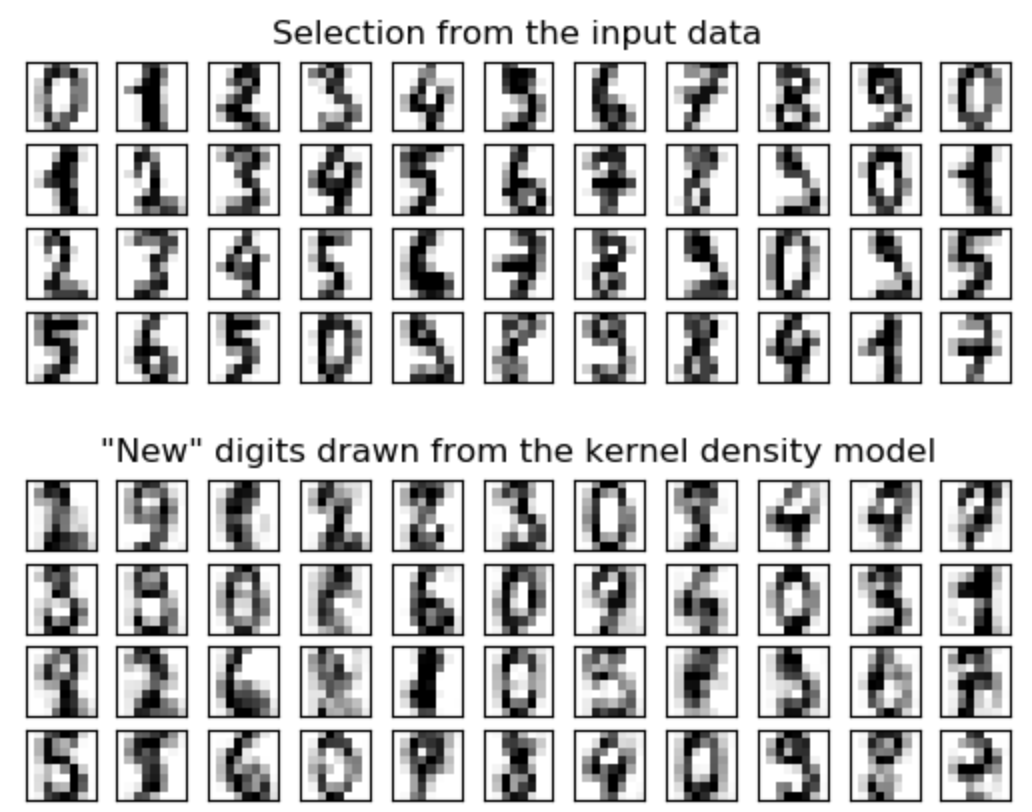

```
Out:

best bandwidth: 3.79269019073225

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# load the data
digits = load_digits()

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()
Total running time of the script: ( 0 minutes 4.927 seconds)

Estimated memory usage: 8 MB

```

## Correlation
Correlation is **used to test relationships between quantitative variables**

Some examples of data that have a **high correlation**:

- Your caloric intake and your weight
- The amount of time your study and your GPA

**Question**: what is negative correlation?

Correlations are useful because we can find out what relationship variables have, we can make predictions about future behavior.

- Running in miles and weight


### Activity: Obtain the correlation among all features in iris dataset
1. Review the iris dataset. What are the features?
2. Eliminate two columns ['Id', 'Species']
3. Compute the correlation among all features

Hint: Use df.corr()

4. Plot the correlation by heatmap and corr plot in Searborn -> sns.heatmap, sns.corrplot
5. Write a function that computes the correlation (Pearson formula)

**Mathematically**
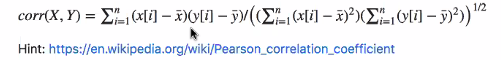

6. Compare your answer with scipy.stats.pearsonr for any given two features


pearson_corr= 0.8717541573048714
Scipy Correlation= (0.8717541573048713, 1.0384540627941062e-47)


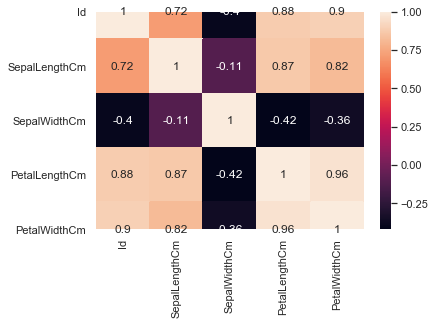

In [48]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

df = pd.read_csv("Iris.csv")
df.drop(columns=["Id", "Species"])
sns.heatmap(df.corr(), annot=True)

# 5 function that computes the correlation (Pearson formula)
def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)] #list comprehension
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(numerator) / np.sqrt(np.sum(den_1)) / np.sqrt(np.sum(den_2))
    return correlation_x_y

print("pearson_corr=", pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
print("Scipy Correlation=", scipy.stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))

### Correlation and Combination formula
- Combination Formula = n(n-1) / 2
- Or Combination Formula = n! / (k! - (n-k)!)
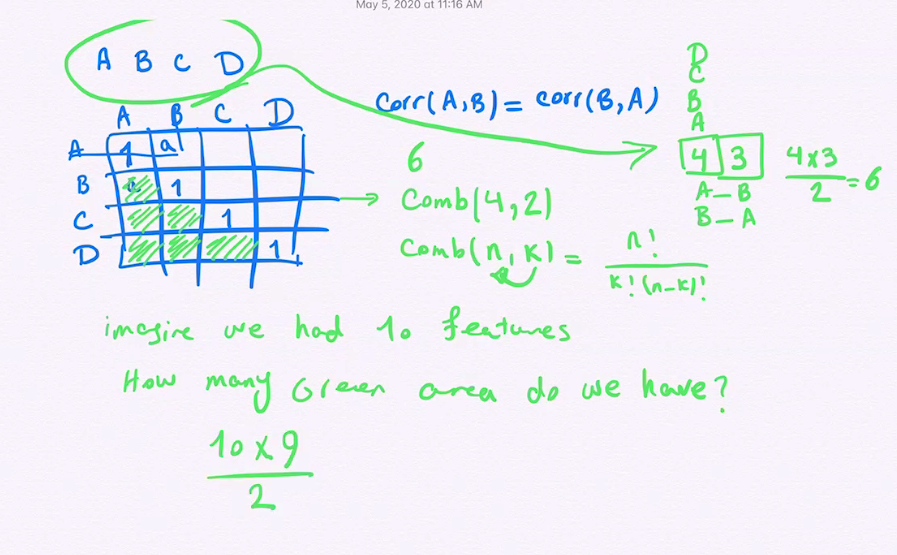

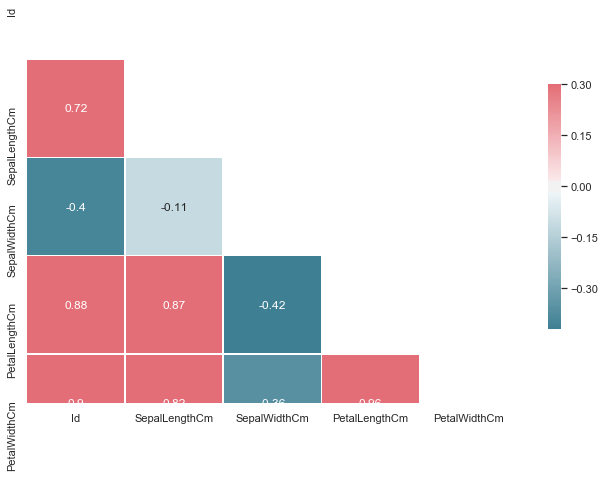

In [44]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
corr  = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:


sns.set(style="white")

### Question: We learned pd.crosstab. What is the difference between crosstab table and correlation heatmap table //1h34
- Answer: crosstab works for categorical columns (is always positive), but correlation works for numerical columns (can be negative)

#### What if we want to ocmpare one categorical (for example Embarkation port) with numerical column (for example fair)?
- Answer: Transform numerical column into categorical (high hair, medium fair, low fair, very low fail) and then use crosstab